## Convolution autoencoder implementation with pytorch

- https://github.com/udacity/deep-learning-v2-pytorch/blob/master/autoencoder/convolutional-autoencoder/Convolutional_Autoencoder_Solution.ipynb

In [1]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

In [2]:
# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# load the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

In [3]:
# create training and test dataloaders

num_workers = 0
batch_size = 20

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)


## Visualize

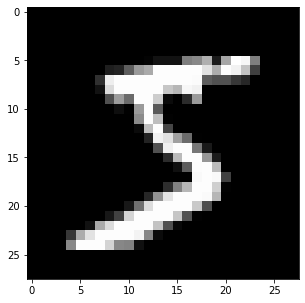

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# get one image from the batch
img = np.squeeze(images[0])

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

## Model

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        
        # encoder
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1) # input channel = 1
        self.conv2 = nn.Conv2d(16, 4, 3, padding=1)
        self.pool = nn.MaxPool2d(2)
        
        # decoder
        self.t_conv1 = nn.ConvTranspose2d(4, 16, 2, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(16, 1, 2, stride=2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        x = F.relu(self.t_conv1(x))
        x = torch.sigmoid(self.t_conv2(x))
        
        return x

model = ConvAutoencoder()
print(model)

ConvAutoencoder(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
  (t_conv2): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
)


In [10]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [11]:
n_epochs = 30

for epoch in range(1, n_epochs+1):
    train_loss = 0.0
    
    for data in train_loader:
        images, _ = data
        optimizer.zero_grad()
        
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()*images.size(0)
    
    train_loss = train_loss/len(train_loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, train_loss))

Epoch: 1 	Training Loss: 0.454009
Epoch: 2 	Training Loss: 0.282800
Epoch: 3 	Training Loss: 0.262410
Epoch: 4 	Training Loss: 0.250695
Epoch: 5 	Training Loss: 0.242649
Epoch: 6 	Training Loss: 0.236319
Epoch: 7 	Training Loss: 0.231072
Epoch: 8 	Training Loss: 0.226007
Epoch: 9 	Training Loss: 0.220242
Epoch: 10 	Training Loss: 0.210364
Epoch: 11 	Training Loss: 0.199414
Epoch: 12 	Training Loss: 0.192582
Epoch: 13 	Training Loss: 0.188106
Epoch: 14 	Training Loss: 0.184485
Epoch: 15 	Training Loss: 0.181476
Epoch: 16 	Training Loss: 0.179082
Epoch: 17 	Training Loss: 0.177286
Epoch: 18 	Training Loss: 0.175856
Epoch: 19 	Training Loss: 0.174668
Epoch: 20 	Training Loss: 0.173666
Epoch: 21 	Training Loss: 0.172819
Epoch: 22 	Training Loss: 0.172138
Epoch: 23 	Training Loss: 0.171553
Epoch: 24 	Training Loss: 0.171020
Epoch: 25 	Training Loss: 0.170581
Epoch: 26 	Training Loss: 0.170197
Epoch: 27 	Training Loss: 0.169870
Epoch: 28 	Training Loss: 0.169566
Epoch: 29 	Training Loss: 0.1

### Testing

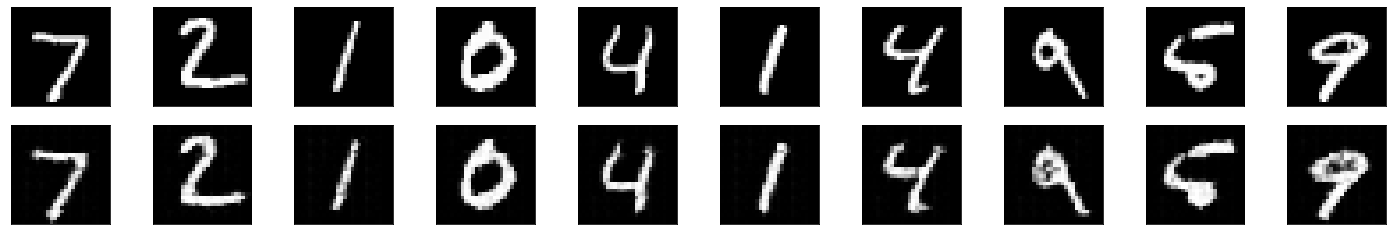

In [14]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

output = model(images)
images = images.numpy()

output = output.view(batch_size, 1, 28, 28)
output = output.detach().numpy()

fix, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25, 4))

for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

---

### High-level API

In [5]:
import torch.nn as nn
net2 = torch.nn.Sequential(
    nn.Conv2d(1, 16, 3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(16, 4, 3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    
    nn.ConvTranspose2d(4, 16, 2, stride=2),
    nn.ReLU(),
    nn.ConvTranspose2d(16, 1, 2, stride=2),
    nn.Sigmoid()
)

In [6]:
print(net2)

Sequential(
  (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
  (7): ReLU()
  (8): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
  (9): Sigmoid()
)


In [8]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net2.parameters(), lr = 0.001)

In [9]:
n_epochs = 30

for epoch in range(1, n_epochs+1):
    train_loss = 0.0
    
    for data in train_loader:
        images, _ = data
        optimizer.zero_grad()
        
        outputs = net2(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()*images.size(0)
    
    train_loss = train_loss/len(train_loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, train_loss))

Epoch: 1 	Training Loss: 0.536002
Epoch: 2 	Training Loss: 0.267591
Epoch: 3 	Training Loss: 0.247034
Epoch: 4 	Training Loss: 0.233477
Epoch: 5 	Training Loss: 0.212858
Epoch: 6 	Training Loss: 0.192776
Epoch: 7 	Training Loss: 0.185597
Epoch: 8 	Training Loss: 0.181946
Epoch: 9 	Training Loss: 0.179390
Epoch: 10 	Training Loss: 0.177609
Epoch: 11 	Training Loss: 0.176325
Epoch: 12 	Training Loss: 0.175136
Epoch: 13 	Training Loss: 0.174000
Epoch: 14 	Training Loss: 0.172868
Epoch: 15 	Training Loss: 0.171881
Epoch: 16 	Training Loss: 0.171059
Epoch: 17 	Training Loss: 0.170385
Epoch: 18 	Training Loss: 0.169813
Epoch: 19 	Training Loss: 0.169316
Epoch: 20 	Training Loss: 0.168844
Epoch: 21 	Training Loss: 0.168385
Epoch: 22 	Training Loss: 0.167936
Epoch: 23 	Training Loss: 0.167516
Epoch: 24 	Training Loss: 0.167121
Epoch: 25 	Training Loss: 0.166746
Epoch: 26 	Training Loss: 0.166400
Epoch: 27 	Training Loss: 0.166085
Epoch: 28 	Training Loss: 0.165791
Epoch: 29 	Training Loss: 0.1

### Testing

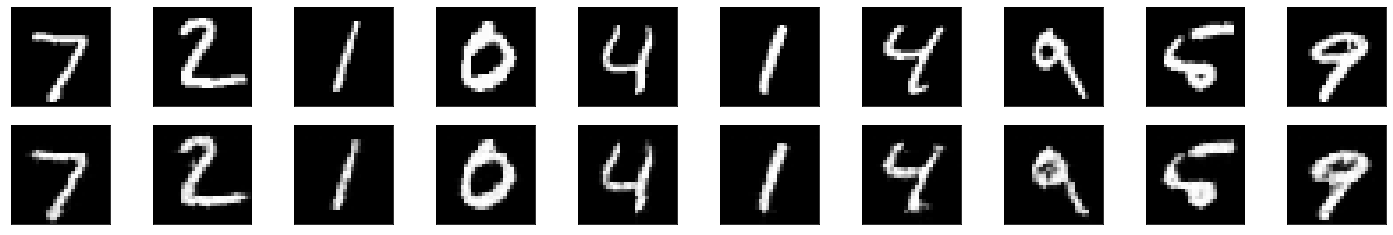

In [11]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

output = net2(images)
images = images.numpy()

output = output.view(batch_size, 1, 28, 28)
output = output.detach().numpy()

fix, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25, 4))

for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)